In [1]:
##Objective: Applying various ML models on this data to predict which creditcard transctions are fruad.
#We will apply ML algorithms like Logistic regression, Decision tree, Random forest,KNN to 
#find out which one predicts more accurately.

In [2]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import matplotlib # For versioning

# Print Versions for sharing Projects

print(f"Pandas Version : Pandas {pd.__version__}")
print(f"Numpy Version : Numpy {np.__version__}")
print(f"Matplotlib Version : Matplotlib {matplotlib.__version__}")
print(f"Seaborn Version : Seaborn {sns.__version__}")

# Magic Functions for In-Notebook Display
%matplotlib inline

Pandas Version : Pandas 0.24.2
Numpy Version : Numpy 1.16.4
Matplotlib Version : Matplotlib 3.1.0
Seaborn Version : Seaborn 0.9.0


In [3]:
df = pd.read_csv('creditcard.csv')

In [3]:

# Create a new cell - Esc+B
# Delete a new cell - Esc+X
# Creating a Markdown Cell - Esc+M


In [4]:
dir(pd.set_option.__setattr__)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__objclass__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__text_signature__']

In [6]:
#pd.set_option('display.max_rows' , 500)-To see 500 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
df.shape

(284807, 31)

In [9]:
df.Class.unique()

array([0, 1], dtype=int64)

In [10]:
df.Time.dtype

dtype('float64')

In [10]:
# Amount column is not normalised !! > To be fixed later ( Pre processing task 2 )
# Normalising or Scaling means modifying values such that => Mean = 0 , Std Dev = 1

In [11]:
df.Class.unique()
# 0  - Genuine Class
# 1 - Fraud Class

array([0, 1], dtype=int64)

In [12]:
# Better Design
print(f"Rows : {df.shape[0]}") # Also the length of the dataset
print(f"Columns : {df.shape[1]}")

Rows : 284807
Columns : 31


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [14]:
# All data types are float64 ,except 1 : Class 
# 28 columns have Sequential Names and values that don't make any logical sense - > V1 , V2 ....V28
# 3 columns : TIME , AMOUNT and CLASS which can be analysed for various INSIGHTS ! 
# Memory Usage : 64 MB , not so Harsh !!
# Column names are not lower_case , must fix this : Standardisation ( Data Pre Processing Task 3)
# Null values currently don't exist in any column , no missing values ! 

In [5]:
df.describe() # Use df['col_name'] for column analysis

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [16]:
df['Class'].quantile(0.999)

1.0

In [17]:
df[['Amount' , 'Class' , 'Time']].describe()

,Amount,Class,Time
count,284807.000000,284807.000000,284807.000000
mean,88.349619,0.001727,94813.859575
std,250.120109,0.041527,47488.145955
min,0.000000,0.000000,0.000000
25%,5.600000,0.000000,54201.500000
50%,22.000000,0.000000,84692.000000
75%,77.165000,0.000000,139320.500000
max,25691.160000,1.000000,172792.000000


In [18]:
#Observations -
#Time column is not in standard measures , probably in seconds , but max of time is not equal to the length of the dataframe, so there sure are some transactions at the same time
#Amount Min is 0 , must observe that for some errors or outliers
#Unscaled amount with high possible skewness , based on min , max and mean
#Class Imbalance Issue surely Exists - Let's discuss this further

In [19]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [20]:
df[['Amount' , 'Class' , 'Time']].describe()   #include = 'all' for categorical

,Amount,Class,Time
count,284807.000000,284807.000000,284807.000000
mean,88.349619,0.001727,94813.859575
std,250.120109,0.041527,47488.145955
min,0.000000,0.000000,0.000000
25%,5.600000,0.000000,54201.500000
50%,22.000000,0.000000,84692.000000
75%,77.165000,0.000000,139320.500000
max,25691.160000,1.000000,172792.000000


In [21]:
# Since the time column is not in any standard sense , Datetime format or Timestamp format
# And as it starts from 0 , the dataset must have a starting and ending point, let's find what time span is !

In [22]:
# Important to know the time span of the data -
print(df['Time'].min() / (60*60))
print(df['Time'].max() / (60*60)) # ~ 48 hours , so 2 days ! , better picture 

0.0
47.99777777777778


In [14]:
df['Time'].max()

172792.0

In [15]:
print(df.isnull().any().sum()) # 3 ways
print('\n')
print(df.isnull().sum())
print('\n')
print(df.isnull().values.any()) # df['col_name']

0


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


False


In [5]:
print(len(df.drop_duplicates())) # Length of dataframe > Length after drop_duplicates()
print(len(df[df.duplicated()]))  # 1081 duplicate values , remove them !
# Quality Wise : Duplicates / Total Length = 1081/284807 = 0.00379  = 0.38 %

283726
1081


In [17]:
len(df)

284807

In [6]:
df.duplicated().value_counts()

False    283726
True       1081
dtype: int64

In [7]:
# Removing the Duplicate Values
df.drop_duplicates(inplace = True)
print(len(df))  # some data reduced

283726


In [21]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
df.reset_index(drop = True , inplace = True)

In [25]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
283721,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
283722,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
283723,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
283724,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
283725,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [26]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
# Converting all column names to lower case # Task -3
df.columns = df.columns.str.lower() # .upper()

In [28]:
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

In [35]:
#Let's understand the depth of the data using the three logically named columns : TIME , AMOUNT , CLASS`

In [36]:
#Amount column

In [10]:
import warnings
warnings.filterwarnings('ignore') # USE this!

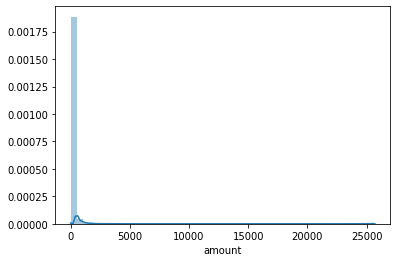

In [11]:
plt.figsize = (20,20)
sns.distplot(df['amount'])
plt.show()

In [39]:
##Observation for the Amount Column:
#Data Set with respect to Amount is highly skewed, lots of small value / amount transactions.

In [12]:
df['hour'] = df['time']/(60*60) # We should use the %24 hours

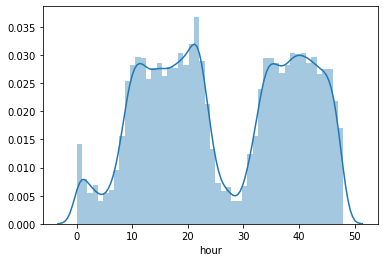

In [14]:
# Time plots 
plt.figsize = (20,20)
sns.distplot(df['hour'])
plt.show()

In [42]:
#Observation for Time:
#We can see during the night time there are less transactions happening hence that ridge in the graph. 

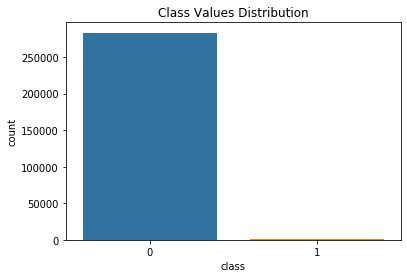

In [13]:
#Class Plot
plt.figsize = (20,20)
sns.countplot(df['class']) # Highly Skewed , Imbalanced Data
plt.title('Class Values Distribution')
plt.show()

In [44]:
#We can see there's a huge imbalance in the Class coloumn.The no. of fraud transactions are too low. 

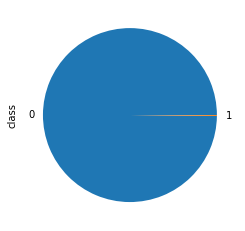

In [14]:
df['class'].value_counts().plot(kind = 'pie') # Different Style
# Plot the same pie chart with percnetages as legends ! 
# plt.legend( loc = 'right', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, sizes)])

([<matplotlib.patches.Wedge at 0x1cf1338f4a8>,
 [Text(-1.1999835424914616, 0.006284723513625731, 'Genuine '),
  Text(1.1999835428684147, -0.006284651539043478, 'Fraud ')],
 [Text(-2.499965713523878, 0.013093173986720275, '99.833%'),
  Text(2.4999657143091976, -0.013093024039673912, '0.167%')])

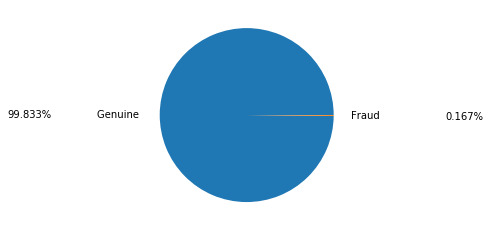

In [35]:
labels = ['Genuine ','Fraud ']
plt.pie(df['class'].value_counts(), labels=labels, autopct='%0.3f%%' , pctdistance=2.5, labeldistance=1.2)

In [36]:
df['class'].value_counts()
# Class 0 is Legitimate , Genuine Transactions
# Class 1 represents Fraudulent Transactions

0    283253
1       473
Name: class, dtype: int64

In [48]:
#Visualising Data with Histogram Plots:

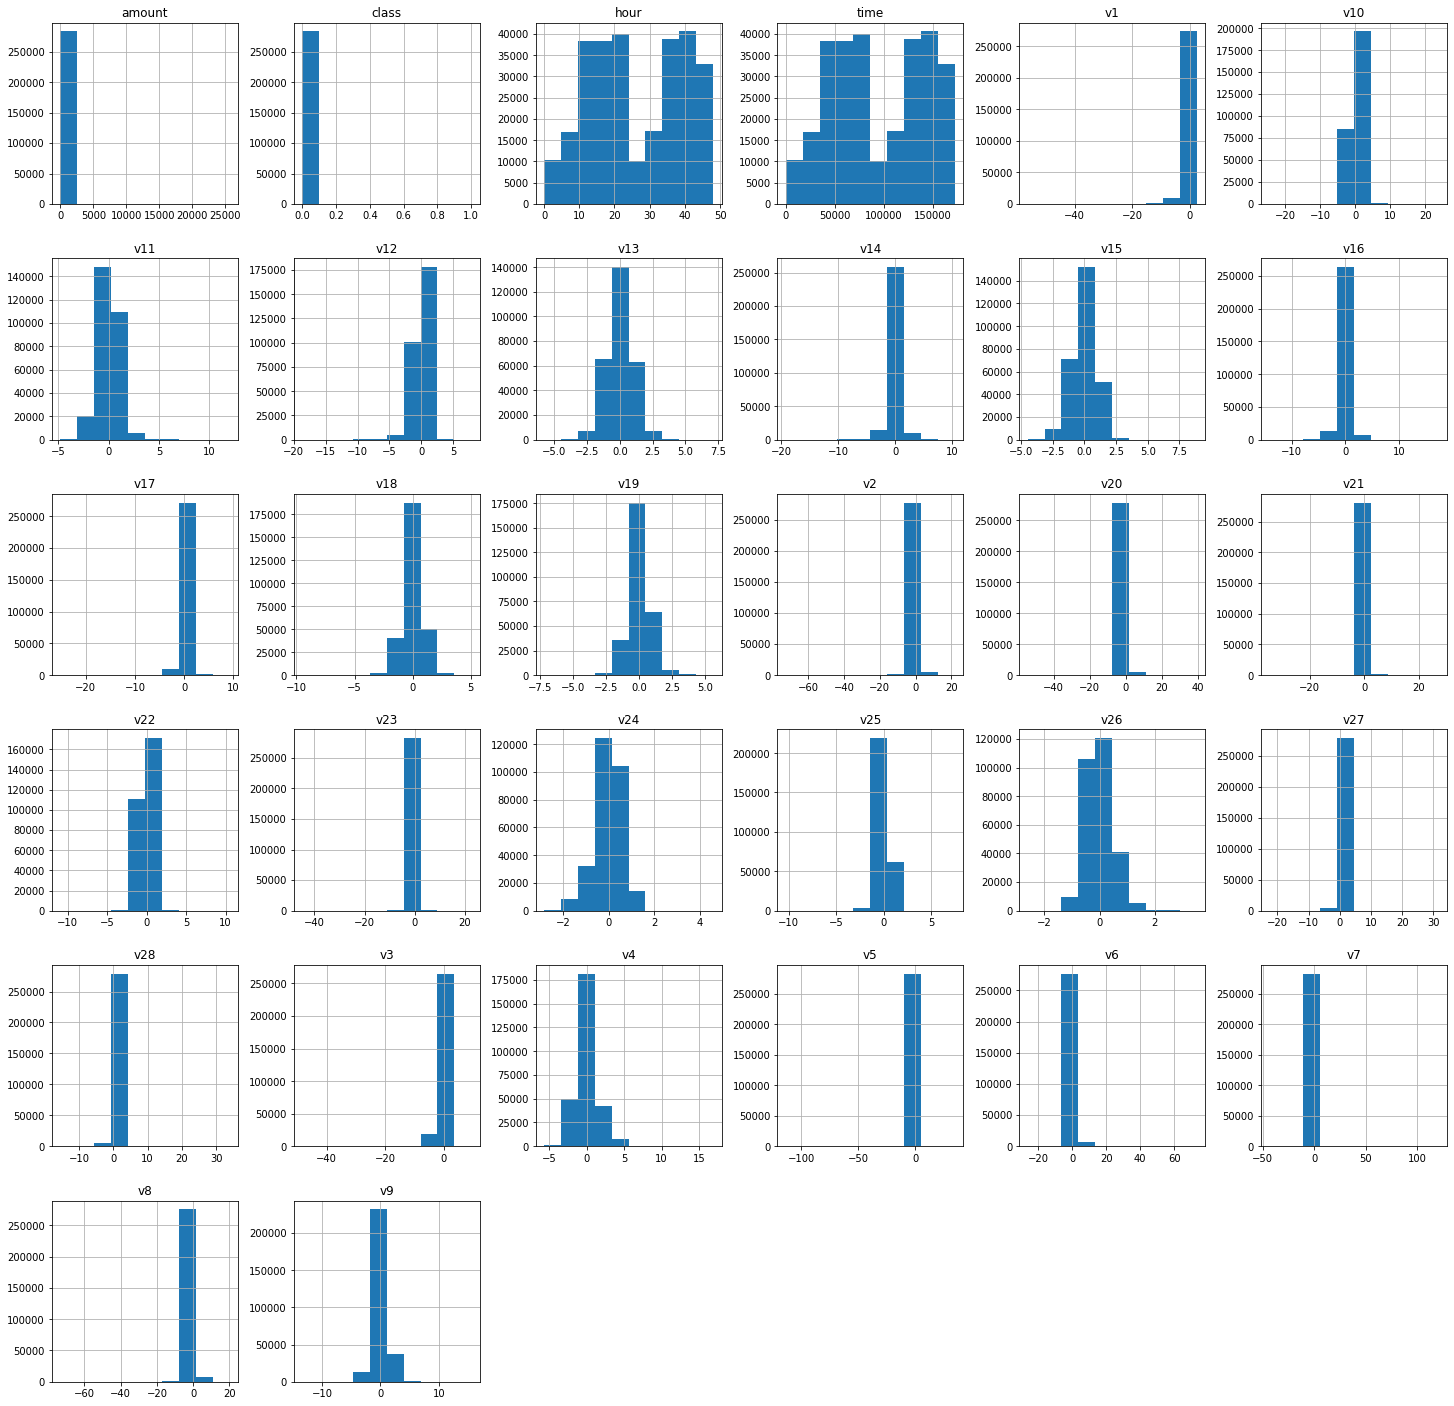

In [49]:
df.hist(figsize = (25,25))
plt.show()

In [50]:
df.corr()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v22,v23,v24,v25,v26,v27,v28,amount,class,hour
time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359,1.000000
v1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486,0.117927
v2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624,-0.010556
v3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322,-0.422054
v4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326,-0.105845
v5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812,0.173223
v6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915,-0.063279
v7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347,0.085335
v8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068,-0.038203
v9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021,-0.007861


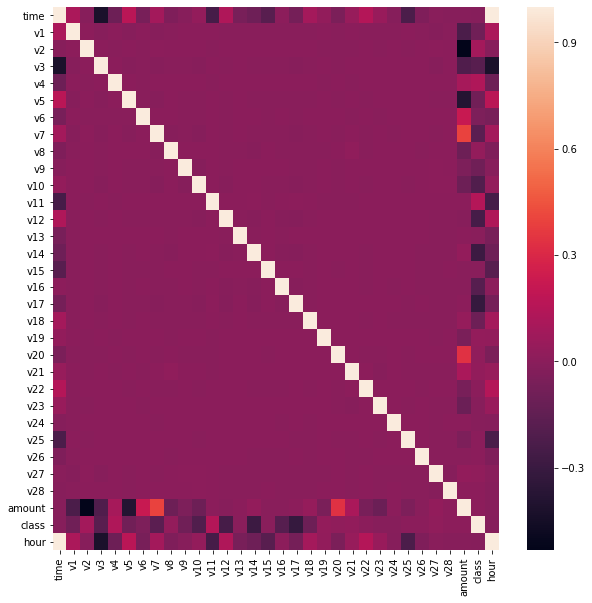

In [51]:
# Plotting a Correlation Plot to observe any correlations or patterns between the columns if the dataset.

corr_matrix = df.corr()
plot = plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix) # seaborn Library
plt.show()

In [ ]:
# Finally let's also plot a box plot for observing if columns have some outliers , or a particular column is messy
for col in df.columns:
    plt.figure()
    df[col].plot(kind = 'box')

In [53]:
# Class - Genuine , Fraud
# df['class'].map({'0':'Genuine' , '1':'Fraud'})

# df['col_name'] = df['col_name'].replace(np.nan , 'replace_value')

In [54]:
pd.set_option('display.max_rows' , 500)
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v22,v23,v24,v25,v26,v27,v28,amount,class,hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556


In [55]:
#After Observation we now fix the problems that we observed , also help in better visualisation
#First we create we create , modify and handle columns and then visualise again¶
#1. Handling the TIME column
#2. Scaling and Binning the AMOUNT column
#3. Solving the Imbalance of the CLASS columns

In [56]:
# Handle the time columns - Convert from seconds to Hours
# Bin the Amount columns : pd.cut()
# Solving the Imbalance - imblearn python library ( Undersampling , Over Sampling and SMOTE -)

In [15]:
### Processing the Time Column

df['hour'] = df['time']/(60*60)%24   # 2 days of data

import math
df['hour'] = df['hour'].apply(lambda x : math.floor(x))

In [58]:
#Scale the Amount Column
# StandardScaler RobustScaler

In [16]:
from sklearn.preprocessing import StandardScaler # importing a class from a module of a library

ss = StandardScaler() # object of the class StandardScaler ()

In [60]:
# fit - > amount column
# transform - > StandardScaler

# predict - > test data ( prediction )

In [17]:
df['amount'].values.reshape(-1 , 1)

array([[149.62],
       [  2.69],
       [378.66],
       ...,
       [ 67.88],
       [ 10.  ],
       [217.  ]])

In [18]:
ss.fit_transform(df['amount'].values.reshape(-1,1))

array([[ 0.24419951],
       [-0.34258399],
       [ 1.15889967],
       ...,
       [-0.0822395 ],
       [-0.31339058],
       [ 0.51329005]])

In [19]:
df['amount_scaled'] = ss.fit_transform(df['amount'].values.reshape(-1,1))

In [44]:
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v23,v24,v25,v26,v27,v28,amount,class,hour,amount_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0.244200
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,-0.342584
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1.158900
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0.139886
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,-0.073813


In [65]:
#Visualising Again

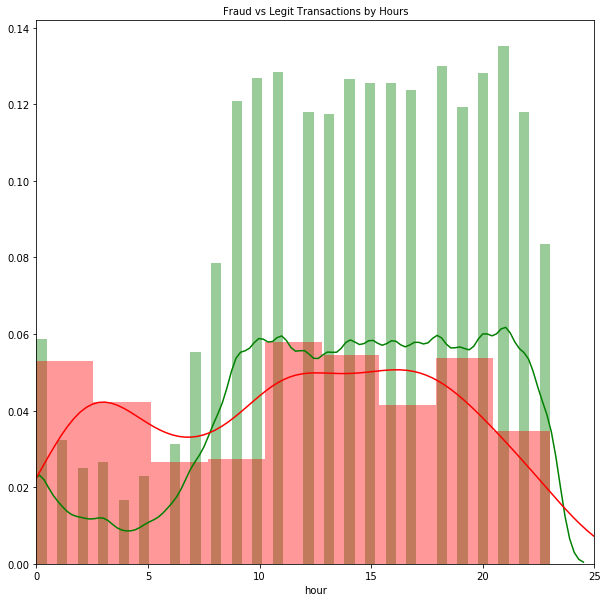

In [20]:
# Let's see if we find any particular pattern between time ( in hours ) and Fraud vs Legit Transactions

# matplotlib.pyplot as plt

plt.figure(figsize=(10,10)) # tuple of the figure size
# seaborn as sns

sns.distplot(df[df['class'] == 0]["hour"], color='g') # Genuine - green

sns.distplot(df[df['class'] == 1]["hour"], color='r') # Frauduletn - Red

plt.title('Fraud vs Legit Transactions by Hours', fontsize=10)
plt.xlim([0,25])
plt.show()

In [67]:
# with a very small confidence we may say that Fraud transactions are more frequent towards the night , assumption
# But thats not significant enough

In [21]:
# Observing patterns in No of Legit Transactions vs Time (Hour) to observe more

legit_hour_count = df[df['class']==0].groupby(['hour'] , as_index = False)['hour'].size().reset_index(name = 'Count')

In [22]:
legit_hour_count

,hour,Count
0,0,7641
1,1,4198
2,2,3260
3,3,3470
4,4,2181
5,5,2977
6,6,4073
7,7,7210
8,8,10223
9,9,15751


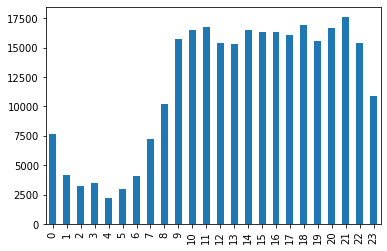

In [48]:
legit_hour_count['Count'].plot(kind = 'bar')

In [23]:
pd.DataFrame(df[df['class']==1].hour.value_counts().rename_axis('hour').reset_index(name = 'Count')).sort_values(by = ['hour'])


,hour,Count
23,0,6
18,1,10
1,2,48
11,3,17
7,4,23
17,5,11
21,6,9
5,7,23
19,8,9
15,9,16


In [24]:
fraud_hour_count = df[df['class']==1].groupby(['hour'] , as_index = False)['hour'].size().reset_index(name = 'Count')

In [73]:
fraud_hour_count.head()

,hour,Count
0,0,6
1,1,10
2,2,48
3,3,17
4,4,23


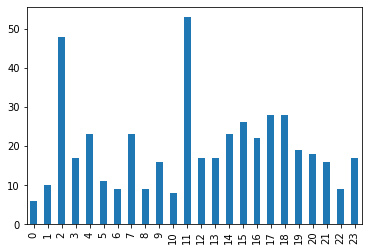

In [74]:
fraud_hour_count['Count'].plot(kind = 'bar')

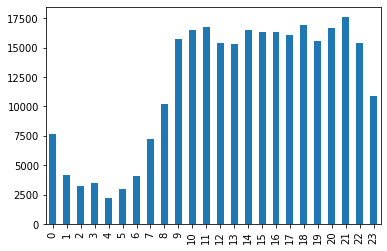

In [75]:
legit_hour_count['Count'].plot(kind = 'bar')

###############
###############Let's Discuss Next Steps -

####1 Classification Models
#Logistic Regression
#Decision Trees

#####2 Class Imbalance Solutions
#Under Sampling
#Over Sampling
#SMOTE (Synthetic Minority OverSampling Technique)


####3 Metrics
#Accuracy Score
#Confusion Matrix
#ROC_AUC
#F1 Score

1.As in the above analysis we found that time variable doesn't make any senseto when a fraud transaction is happening so we remove that variable from our dataset.
2.We remove amount coloumn as we have amount_scaled coloumn.
3.We remove hour coloumn as also it doesn't make any sense.
4.Class is our dependent variable.

In [76]:
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v23,v24,v25,v26,v27,v28,amount,class,hour,amount_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0.244200
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,-0.342584
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1.158900
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0.139886
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,-0.073813


In [27]:
y = df['class'].values

X = df.drop(columns = ['time' , 'amount' , 'hour' , 'class'])

In [26]:
X.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813


In [28]:
from sklearn.linear_model import LogisticRegression # Importing Classifier Step
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # Sequence for splitting


logreg = LogisticRegression() # () towards the end
logreg.fit(X_train, y_train )   

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score


print(accuracy_score(y_pred , y_test))

0.9991541154632393


In [82]:
#Class Imbalance

In [57]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test , y_pred)

cnf_matrix

array([[84976,    13],
       [   59,    70]], dtype=int64)

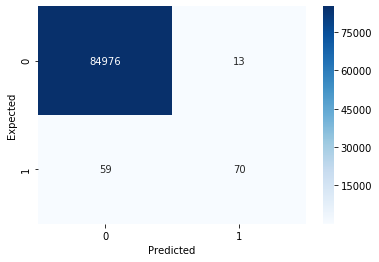

In [58]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

#Understanding the Confusion Matrix Plot
#Why and When ? -
#Every problem is different and derives a different set of values for a particular business use case , thus every model must be evaluated differently.
#Let's get to know the terminology and Structure first -
#A confusion matrix is defined into four parts : { TRUE , FALSE } (Actual) ,{POSITIVE , NEGATIVE} (Predicted) Positive and Negative is what you predict , True and False is what you are told

#Which brings us to 4 relations : True Positive , True Negative , False Positive , False Negative
#Predicted - Rows and Actual as C olumns

#Accuracy , Precision and Recall
#Accuracy - > The most used and classic classification metric : Suited for binary classification problems.
#Accuracy = ( TP + TN ) / (TP + TN + FP + FN )

#Basically Rightly predicted results amongst all the results , used when the classes are balanced

#Precision - > What proportion of predicted positives are truly positive ? Used when we need to predict the positive thoroughly, sure about it !
#Precision = ( TP ) / ( TP + FP )

#Recall - > What proportion of actual positives is correctly classified ? choice when we want to capture as many positives as possible
#Recall = TP / ( TP + FN )
#F1 Score
#Harmonic mean of Precision and RecallF1 = 2*(precision * recall) / (precision + recall )
It basically maintains a balance between the precision and recall for your classifier

What is an ROC_AUC Curve ?

It is an evaluation metric that helps identify the strength of the model to distinguish between two outcomes. It defines if a model can create a clear boundary between the postive and the negative class.

Let's talk about some definitions first:

Sensitivity
The sensitivity of a model is defined by the proportion of actual positives that are classified as Psitives , i.e = TP / ( TP + FN )

Specificity
The specificity of a model is defined by the proportion of actual negatives that are classified as Negatives , i.e = TN / ( TN + FP )

As we can see that both are independent of each other and lie in teo different quadrants , we can understand that they are inversely related to each other. Thus as Sensitivity goes up , Specificity goes down and vice versa.

ROC CURVE
It is a plot between Sesitivity and ( 1 - Specificity ) , which intuitively is a plot between True Positive Rate and False Positive Rate. It depicts if a model can clearly identify each class or not

Higher the area under the curve , better the model and it's ability to seperate the positive and negative class

In [64]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test , y_pred) 


0.7712413489716545

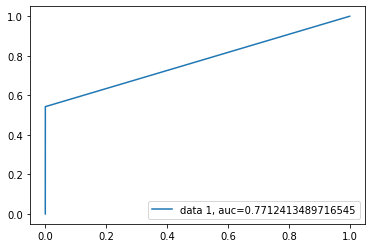

In [65]:
from sklearn.metrics import roc_curve

y_pred_proba = logreg.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  y_pred)

auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [66]:
#Let's Fix the class Imbalance and apply some sampling techniques

In [67]:
# the imblearn library
!pip install imblearn

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [31]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [32]:
from collections import Counter
from sklearn.datasets import make_classification

#X, y = make_classification(n_classes=2) #, class_sep=2,weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 283253, 1: 473})
Resampled dataset shape Counter({0: 473, 1: 473})


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred , y_test))  # Accuracy is surely reducedd , let's look at the roc curve now


0.9401408450704225


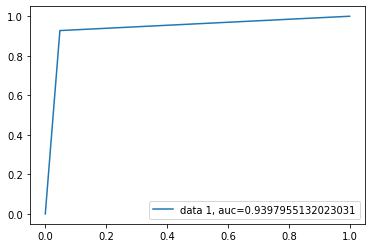

In [77]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Let's try Oversampling

In [33]:
from imblearn.over_sampling import RandomOverSampler


In [34]:
print('Original dataset shape %s' % Counter(y))
random_state = 42
rus = RandomOverSampler(random_state=random_state)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


Original dataset shape Counter({0: 283253, 1: 473})
Resampled dataset shape Counter({0: 283253, 1: 283253})


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred , y_test))  # Accuracy is surely reducedd , let's look at the roc curve now


0.9483501223874976


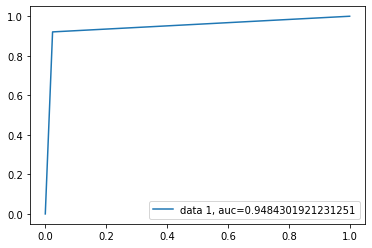

In [82]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# SMOTE Sampling.

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
print('Original dataset shape %s' % Counter(y))

rus = SMOTE(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 283253, 1: 473})
Resampled dataset shape Counter({0: 283253, 1: 283253})


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred , y_test))  # Accuracy is surely reducedd , let's look at the roc curve now

0.9443078045565807


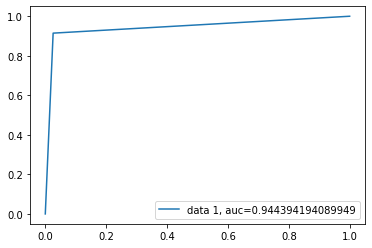

In [87]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [110]:
len(y)

283726

In [ ]:
#Principal Component Analysis

In [112]:
from sklearn.decomposition import PCA # SVD , t-SNE , Linear Discrimant Analysis
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_res)

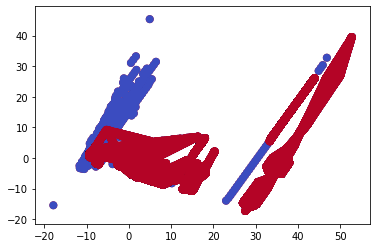

In [113]:
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_res== 0), cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_res == 1), cmap='coolwarm', label='Fraud', linewidths=2)
plt.show()

In [ ]:
# let's now try either different models , first by creating multiple datsets for undersampled , oversampled and SMOTE sampled

In [ ]:
#Undersampled Data

In [37]:
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_under))


Resampled dataset shape Counter({0: 473, 1: 473})


In [ ]:
#Oversampled Data

In [38]:
rus = RandomOverSampler(random_state=42)
X_over, y_over = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_over))

Resampled dataset shape Counter({0: 283253, 1: 283253})


In [ ]:
#SMOTE Data

In [39]:
rus = SMOTE(random_state=42)
X_smote, y_smote = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_smote))

Resampled dataset shape Counter({0: 283253, 1: 283253})


#Now applying different models and evaluating the dataset

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Classifier 2 - Decision Tree Classifier

0.9992481026339904


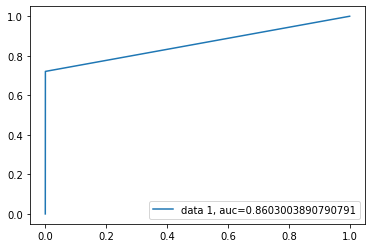

In [119]:
#Raw Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dte = DecisionTreeClassifier()
dte.fit( X_train, y_train )

y_pred = dte.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

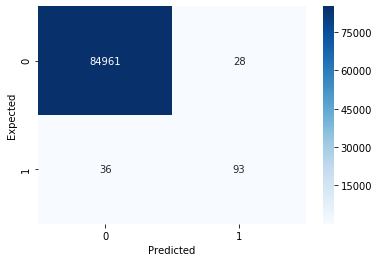

In [120]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

0.8908450704225352


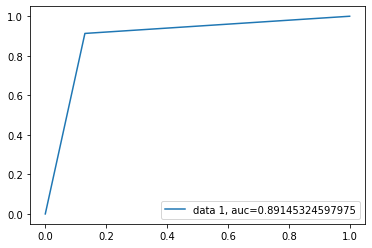

In [121]:
# Undersampled data with Decision Tree Classifiers

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
dte = DecisionTreeClassifier()
dte.fit(X_train, y_train)

y_pred = dte.predict(X_test)
print(accuracy_score(y_pred , y_test))

y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

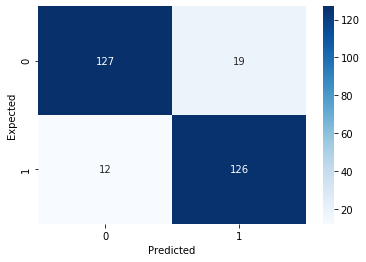

In [122]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

0.9996057710412352


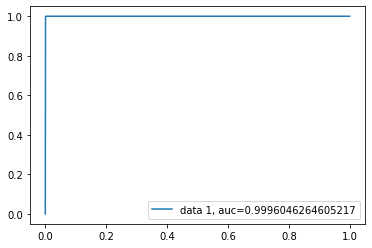

In [123]:
# Oversampled data with Decision Tree Classifiers # Best model after Classifier - DTE

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
dte = DecisionTreeClassifier()
dte.fit(X_train, y_train)

y_pred = dte.predict(X_test)
print(accuracy_score(y_pred , y_test))

y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

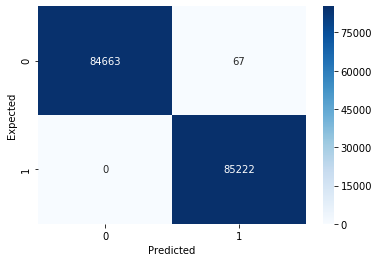

In [124]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

0.9980759273206552


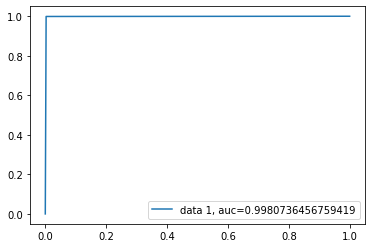

In [125]:
# SMOTE data with Decision Tree Classifiers

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
dte = DecisionTreeClassifier()
dte.fit(X_train, y_train)

y_pred = dte.predict(X_test)
print(accuracy_score(y_pred , y_test))

y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

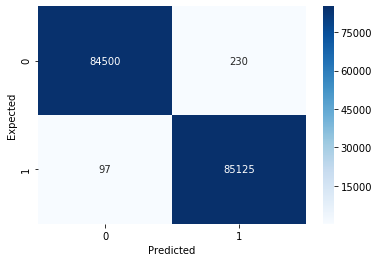

In [126]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Classifier-2 Random Forest Classifier

0.9995418125425879


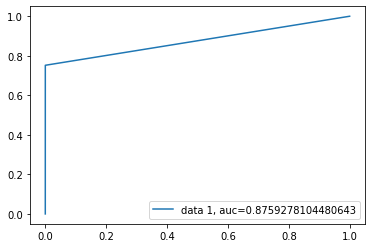

In [127]:
# Raw Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )

y_pred = rfc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

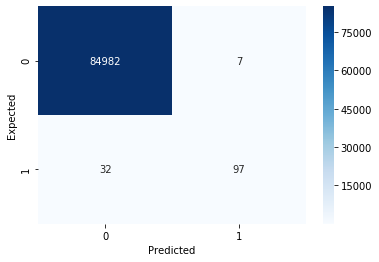

In [128]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

0.9295774647887324


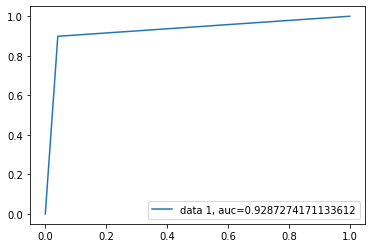

In [129]:
# Undersampled
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )

y_pred = rfc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

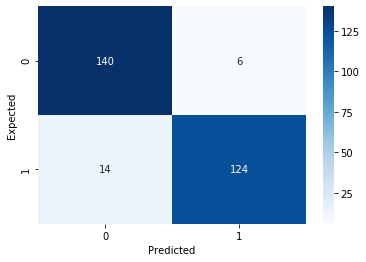

In [130]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

0.9999058557710412


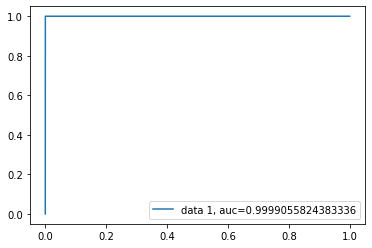

In [131]:
# Oversampled Data
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )

y_pred = rfc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

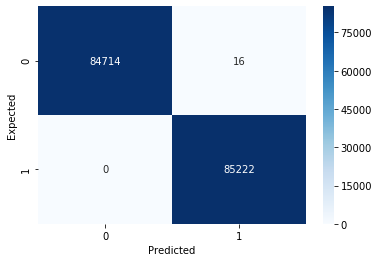

In [132]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

0.9998234795707023


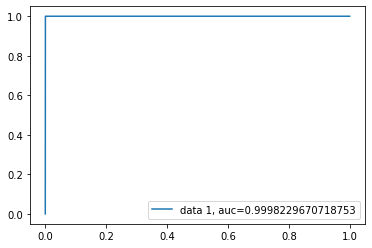

In [133]:
# Smote Data
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )

y_pred = rfc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

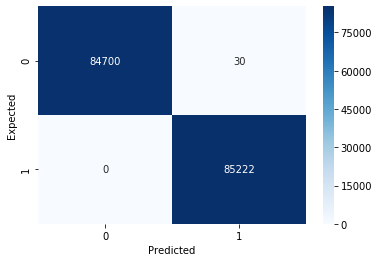

In [134]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
##here we see that we achieve the maximum accuracy with oversampled Random forest classifier.The accuracy is 99%.

Classifier -3 KNearestNeighbors

In [95]:
#Raw Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[84982     7]
 [   31    98]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.93      0.76      0.84       129

    accuracy                           1.00     85118
   macro avg       0.97      0.88      0.92     85118
weighted avg       1.00      1.00      1.00     85118



In [93]:
error_rate = []
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

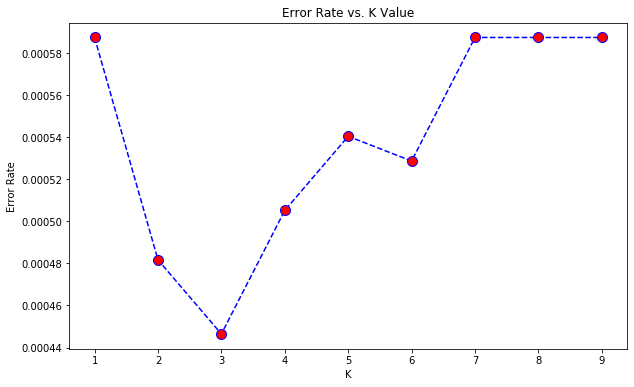

In [94]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [47]:
#Undersampled Data

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[144   2]
 [ 11 127]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       146
           1       0.98      0.92      0.95       138

    accuracy                           0.95       284
   macro avg       0.96      0.95      0.95       284
weighted avg       0.96      0.95      0.95       284



In [41]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

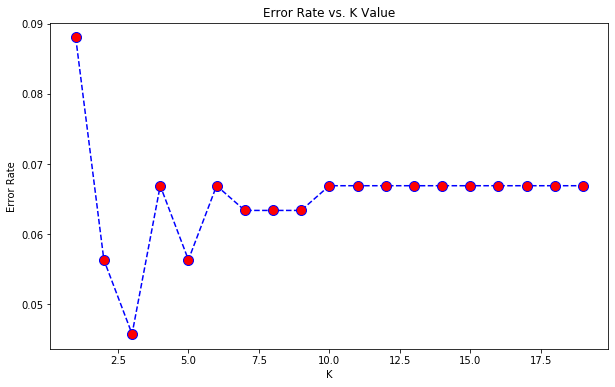

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [51]:
#Oversampled Data

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[84698    32]
 [    0 85222]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84730
           1       1.00      1.00      1.00     85222

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952



In [49]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

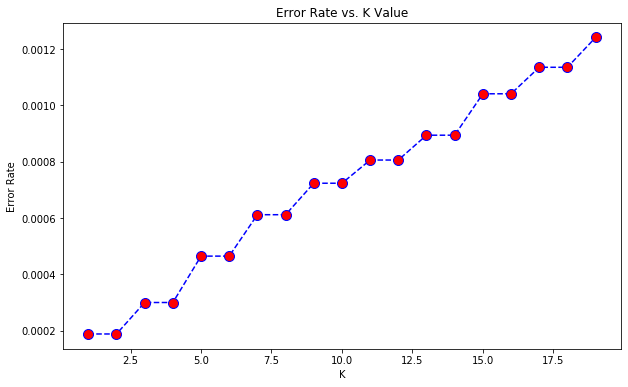

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [52]:
#SMOTE DATA

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[84612   118]
 [    0 85222]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84730
           1       1.00      1.00      1.00     85222

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952



In [ ]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

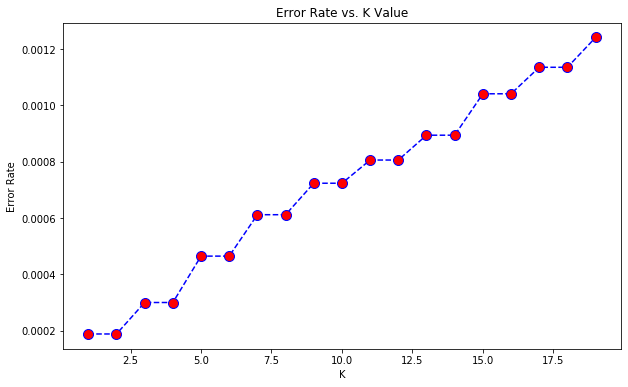

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
##Conclusion: We get the highest accuracy with oversampled Random Forest algorithm i.e. 99% accuracy.

In [ ]:
#Buisness Interpretation: After applying various ML models we have predicted 99% accurately which transactions were 
#                         fruad so when a creditcard lending company uses this model on their customer base they can 
#                         successfully predict which transaction will be fruadulent and thereby take precautionary measures
#                         to prevent fruad transactions and this will save the company from incurrng losses which will in turn
#                         help the company and help them to use this resourse on genuine customers who will pay them back.